In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



import plotly.graph_objs as go
import plotly.express as px
sns.set()

In [ ]:
accidents_raw = pd.read_csv('/content/only_road_accidents_data_month2.csv')

In [ ]:

accidents_raw.head()

,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
0,A & N Islands,2001,8,23,15,15,14,19,14,19,7,12,13,22,181
1,A & N Islands,2002,12,10,14,16,10,7,16,11,23,21,11,17,168
2,A & N Islands,2003,19,13,15,13,13,12,8,16,17,25,14,15,180
3,A & N Islands,2004,21,14,22,17,13,18,16,19,16,20,15,24,215
4,A & N Islands,2005,19,21,22,17,13,19,21,14,15,19,10,16,206


In [ ]:
def master_dataframe(dataframe):
    df_metadata = pd.DataFrame({'Datatype': dataframe.dtypes,
                                "Null Values": dataframe.isna().sum(),
                                "Null %": round(dataframe.isna().sum()/len(dataframe)*100, 2),
                                "No: Of Unique Values": dataframe.nunique()})

    df_describe = dataframe.describe(include='all').T

    df_metadata = df_metadata.join(df_describe)

    corr = dataframe.corr()

    fig, ax = plt.subplots(figsize = (15, 15))
    sns.heatmap(ax=ax,
                data=corr,
                annot=True,
                cmap='flare')
    ax.set_title('Correlation Matrix', fontsize = 16)
    plt.show()

    return df_metadata

<ipython-input-4-d0e91ae3dcd4>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataframe.corr()


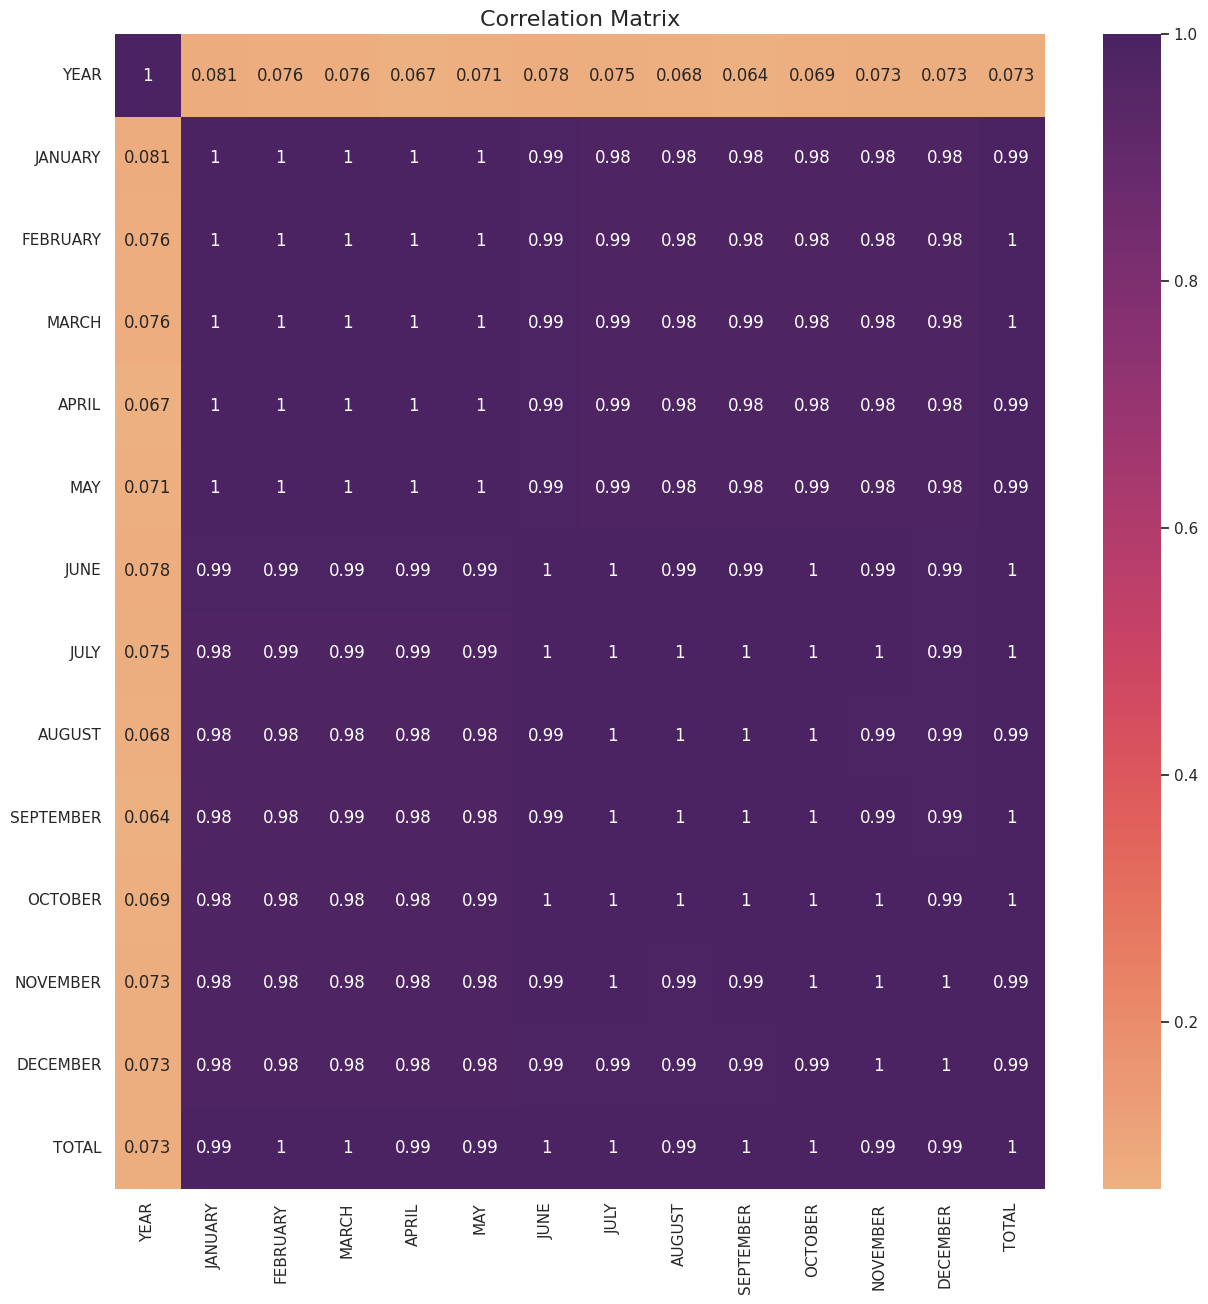

,Datatype,Null Values,Null %,No: Of Unique Values,count,unique,top,freq,mean,std,min,25%,50%,75%,max
STATE/UT,object,0,0.0,37,490,37,A & N Islands,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEAR,int64,0,0.0,14,490.0,NaN,NaN,NaN,2007.5,4.035249,2001.0,2004.0,2007.5,2011.0,2014.0
JANUARY,int64,0,0.0,357,490.0,NaN,NaN,NaN,985.140816,1403.961467,0.0,31.0,329.5,1513.5,9062.0
FEBRUARY,int64,0,0.0,356,490.0,NaN,NaN,NaN,937.289796,1326.92897,0.0,30.0,348.5,1394.25,8705.0
MARCH,int64,0,0.0,349,490.0,NaN,NaN,NaN,992.12449,1403.445117,0.0,32.25,369.0,1381.0,9205.0
APRIL,int64,0,0.0,349,490.0,NaN,NaN,NaN,978.904082,1397.371515,0.0,25.25,350.0,1356.25,9006.0
MAY,int64,0,0.0,359,490.0,NaN,NaN,NaN,1064.414286,1508.16623,0.0,32.25,387.5,1464.0,9330.0
JUNE,int64,0,0.0,358,490.0,NaN,NaN,NaN,966.477551,1345.067531,0.0,28.0,342.5,1384.0,5915.0
JULY,int64,0,0.0,355,490.0,NaN,NaN,NaN,898.495918,1245.805847,0.0,28.25,308.0,1301.5,5719.0
AUGUST,int64,0,0.0,353,490.0,NaN,NaN,NaN,894.593878,1263.668002,0.0,28.5,313.0,1222.25,5936.0


In [ ]:
master_dataframe(accidents_raw)

In [ ]:
accidents_raw[(accidents_raw['STATE/UT'] == "Delhi Ut") | (accidents_raw['STATE/UT'] == "Delhi (Ut)")]

,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
126,Delhi (Ut),2001,707,681,786,762,810,779,763,811,780,821,798,784,9282
127,Delhi (Ut),2002,695,710,847,698,702,665,768,801,706,724,669,725,8710
128,Delhi (Ut),2003,638,645,689,714,719,747,785,803,791,859,778,701,8869
129,Delhi (Ut),2004,730,746,755,719,747,766,727,793,761,778,843,745,9110
130,Delhi (Ut),2005,777,722,850,698,815,773,806,900,831,780,835,793,9580
131,Delhi (Ut),2006,718,726,868,779,796,754,846,863,804,832,865,848,9699
132,Delhi (Ut),2007,818,809,839,786,752,757,834,768,833,1196,921,1215,10528
133,Delhi (Ut),2008,698,696,780,747,713,691,731,721,707,704,671,707,8566
134,Delhi (Ut),2009,607,632,644,646,657,565,610,707,609,639,642,656,7614
135,Delhi (Ut),2010,559,574,616,569,639,545,640,600,574,614,652,638,7220


In [ ]:
accidents_raw.at[139, 'STATE/UT'] = "Delhi (Ut)"

In [ ]:
fig = px.bar(data_frame=accidents_raw,
             x='YEAR',
             y='TOTAL',
             title='Accidents Per Year')

fig.update_layout(title = {'x': 0.5})

fig.show()

In [ ]:
fig = px.bar(data_frame=accidents_raw,
             x='YEAR',
             y='TOTAL',
             color='STATE/UT',
             barmode='stack',
             title='State-wise Accidents Per Year')

fig.update_layout(title = {'x': 0.5})

fig.show()

In [ ]:
fig = px.bar(data_frame=accidents_raw,
             x='YEAR',
             y='TOTAL',
             color='STATE/UT',
             barmode='group',
             title='State-wise Accidents Per Year')

fig.update_layout(title = {'x': 0.5})

fig.show()

In [ ]:
tamil_nadu_2005 = accidents_raw[(accidents_raw['STATE/UT'] == "Tamil Nadu") & (accidents_raw['YEAR'] == 2005)].reset_index()
tamil_nadu_2005.drop(columns=['STATE/UT', 'YEAR', 'TOTAL', 'index'], axis=1, inplace=True)
tamil_nadu_2005 = tamil_nadu_2005.T.reset_index()
tamil_nadu_2005.rename(columns={'index': 'Month', 0:'Accidents'}, inplace=True)


fig = px.pie(data_frame=tamil_nadu_2005,
             values='Accidents',
             names='Month',
             color_discrete_sequence=px.colors.sequential.Aggrnyl,
             title='Accidents in Tamil Nadu In 2005', hole=0.2)

fig.update_layout(title = {'x': 0.5})

fig.show()

In [ ]:
accidents_raw['STATE/UT'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'D&N Haveli', 'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

In [ ]:
UTs = ["A & N Islands", "Chandigarh", "D & N Haveli", "Daman & Diu", "Delhi (Ut)", "Lakshadweep", "Puducherry"]
accidents_UTs = accidents_raw[accidents_raw['STATE/UT'].isin(UTs)]
accidents_UTs


,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
0,A & N Islands,2001,8,23,15,15,14,19,14,19,7,12,13,22,181
1,A & N Islands,2002,12,10,14,16,10,7,16,11,23,21,11,17,168
2,A & N Islands,2003,19,13,15,13,13,12,8,16,17,25,14,15,180
3,A & N Islands,2004,21,14,22,17,13,18,16,19,16,20,15,24,215
4,A & N Islands,2005,19,21,22,17,13,19,21,14,15,19,10,16,206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,Puducherry,2010,114,132,132,119,126,141,151,127,130,139,104,114,1529
374,Puducherry,2011,122,105,119,112,116,109,137,144,140,149,117,110,1480
375,Puducherry,2012,128,125,159,103,133,131,126,119,115,124,119,128,1510
376,Puducherry,2013,102,108,120,139,127,128,126,125,134,129,106,107,1451


In [ ]:
fig = px.bar(data_frame=accidents_UTs,
              x='YEAR',
              y='TOTAL',
             color='STATE/UT')

fig.show()